# BSESN dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Preprocessed Dataset\\Preprocessed_BSESN_Dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
 7   Company    250 non-null    object 
dtypes: float64(6), object(2)
memory usage: 15.8+ KB


In [3]:
data.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Company
26,2020-01-24,41377.039063,41697.031250,41275.601563,41613.191406,41613.191406,6600.0,BSESN
36,2020-02-07,41394.410156,41394.410156,41073.359375,41141.851563,41141.851563,15300.0,BSESN
88,2020-04-29,32311.039063,32897.589844,32171.650391,32720.160156,32720.160156,16000.0,BSESN
213,2020-10-26,40649.761719,40724.398438,39948.289063,40145.500000,40145.500000,10100.0,BSESN
128,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,BSESN


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Close']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test_scaled)

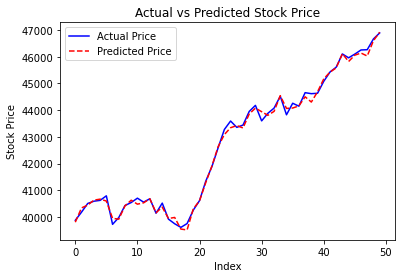

In [12]:


# Assuming y_test is a pandas Series, y_pred is a numpy array or multi-dimensional structure

# Convert y_pred to a 1D numpy array (if it's not already)
y_pred = np.squeeze(np.array(y_pred))  # Flatten if it's multi-dimensional

# Ensure y_test is aligned (if y_test is a pandas Series)
y_test = np.array(y_test)  # You can convert it to a numpy array if needed

# Plot the actual vs predicted values
plt.plot(np.arange(len(y_test)), y_test, label='Actual Price', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Price', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()

# Display the plot
plt.show()
